In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import json
import os
plt.style.use('ggplot')

In [24]:
# Construct a relative path from the workspace root (one level up from notebooks) to the data file using pathlib
workspace_root = Path.cwd().parent
file_path = workspace_root / "data" / "starwars" / "starwars-full-interactions-allCharacters-merged.json"

# Load the JSON file
with open(file_path, 'r') as f:
    data = json.load(f)

# Extract all names from the "nodes" category
names = [node['name'] for node in data['nodes']]
num_scenes = [node['value'] for node in data['nodes']]

print(f"Total nodes: {len(names)}")
print(f"Names: {names}")

Total nodes: 111
Names: ['DARTH VADER', 'R2-D2', 'CHEWBACCA', 'BB-8', 'QUI-GON', 'NUTE GUNRAY', 'PK-4', 'TC-14', 'OBI-WAN', 'DOFINE', 'RUNE', 'TEY HOW', 'EMPEROR', 'CAPTAIN PANAKA', 'SIO BIBBLE', 'JAR JAR', 'TARPALS', 'BOSS NASS', 'PADME', 'RIC OLIE', 'WATTO', 'SEBULBA', 'JIRA', 'SHMI', 'C-3PO', 'DARTH MAUL', 'KITSTER', 'WALD', 'FODE/BEED', 'JABBA', 'GREEDO', 'VALORUM', 'MACE WINDU', 'KI-ADI-MUNDI', 'YODA', 'RABE', 'BAIL ORGANA', 'GENERAL CEEL', 'BRAVO TWO', 'BRAVO THREE', 'CAPTAIN TYPHO', 'SENATOR ASK AAK', 'ORN FREE TAA', 'SOLA', 'JOBAL', 'RUWEE', 'TAUN WE', 'LAMA SU', 'BOBA FETT', 'JANGO FETT', 'OWEN', 'BERU', 'CLIEGG', 'COUNT DOOKU', 'SUN RIT', 'POGGLE', 'PLO KOON', 'ODD BALL', 'GENERAL GRIEVOUS', 'FANG ZAR', 'MON MOTHMA', 'GIDDEAN DANU', 'CLONE COMMANDER GREE', 'CLONE COMMANDER CODY', 'TION MEDON', 'CAPTAIN ANTILLES', 'LUKE', 'CAMIE', 'BIGGS', 'LEIA', 'MOTTI', 'TARKIN', 'HAN', 'DODONNA', 'GOLD LEADER', 'WEDGE', 'RED LEADER', 'RED TEN', 'GOLD FIVE', 'RIEEKAN', 'DERLIN', 'ZEV', 'PIE

In [25]:
sources = [link['source'] for link in data['links']]

In [26]:
# Create a dataframe with names and num_scenes
df = pd.DataFrame({
    'name': names,
    'num_scenes': num_scenes
})

df.head()

,name,num_scenes
0,DARTH VADER,190
1,R2-D2,171
2,CHEWBACCA,145
3,BB-8,40
4,QUI-GON,62


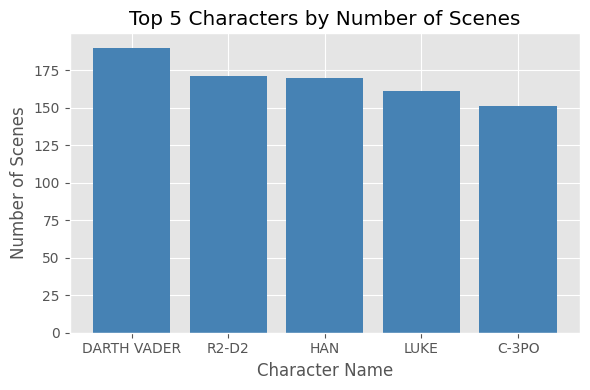

           name  num_scenes
0   DARTH VADER         190
1         R2-D2         171
72          HAN         170
66         LUKE         161
24        C-3PO         151


In [27]:
# Get the top 5 characters by num_scenes
top_5 = df.nlargest(5, 'num_scenes')

# Create a histogram plot
plt.figure(figsize=(6,4))
plt.bar(top_5['name'], top_5['num_scenes'], color='steelblue')
plt.xlabel('Character Name')
plt.ylabel('Number of Scenes')
plt.title('Top 5 Characters by Number of Scenes')
plt.tight_layout()
plt.show()

print(top_5)